In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ecd = pd.read_csv( "/content/sample_data/ElectricCarData_Clean.csv" )
ecd.head(5)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [ ]:
import seaborn as sns

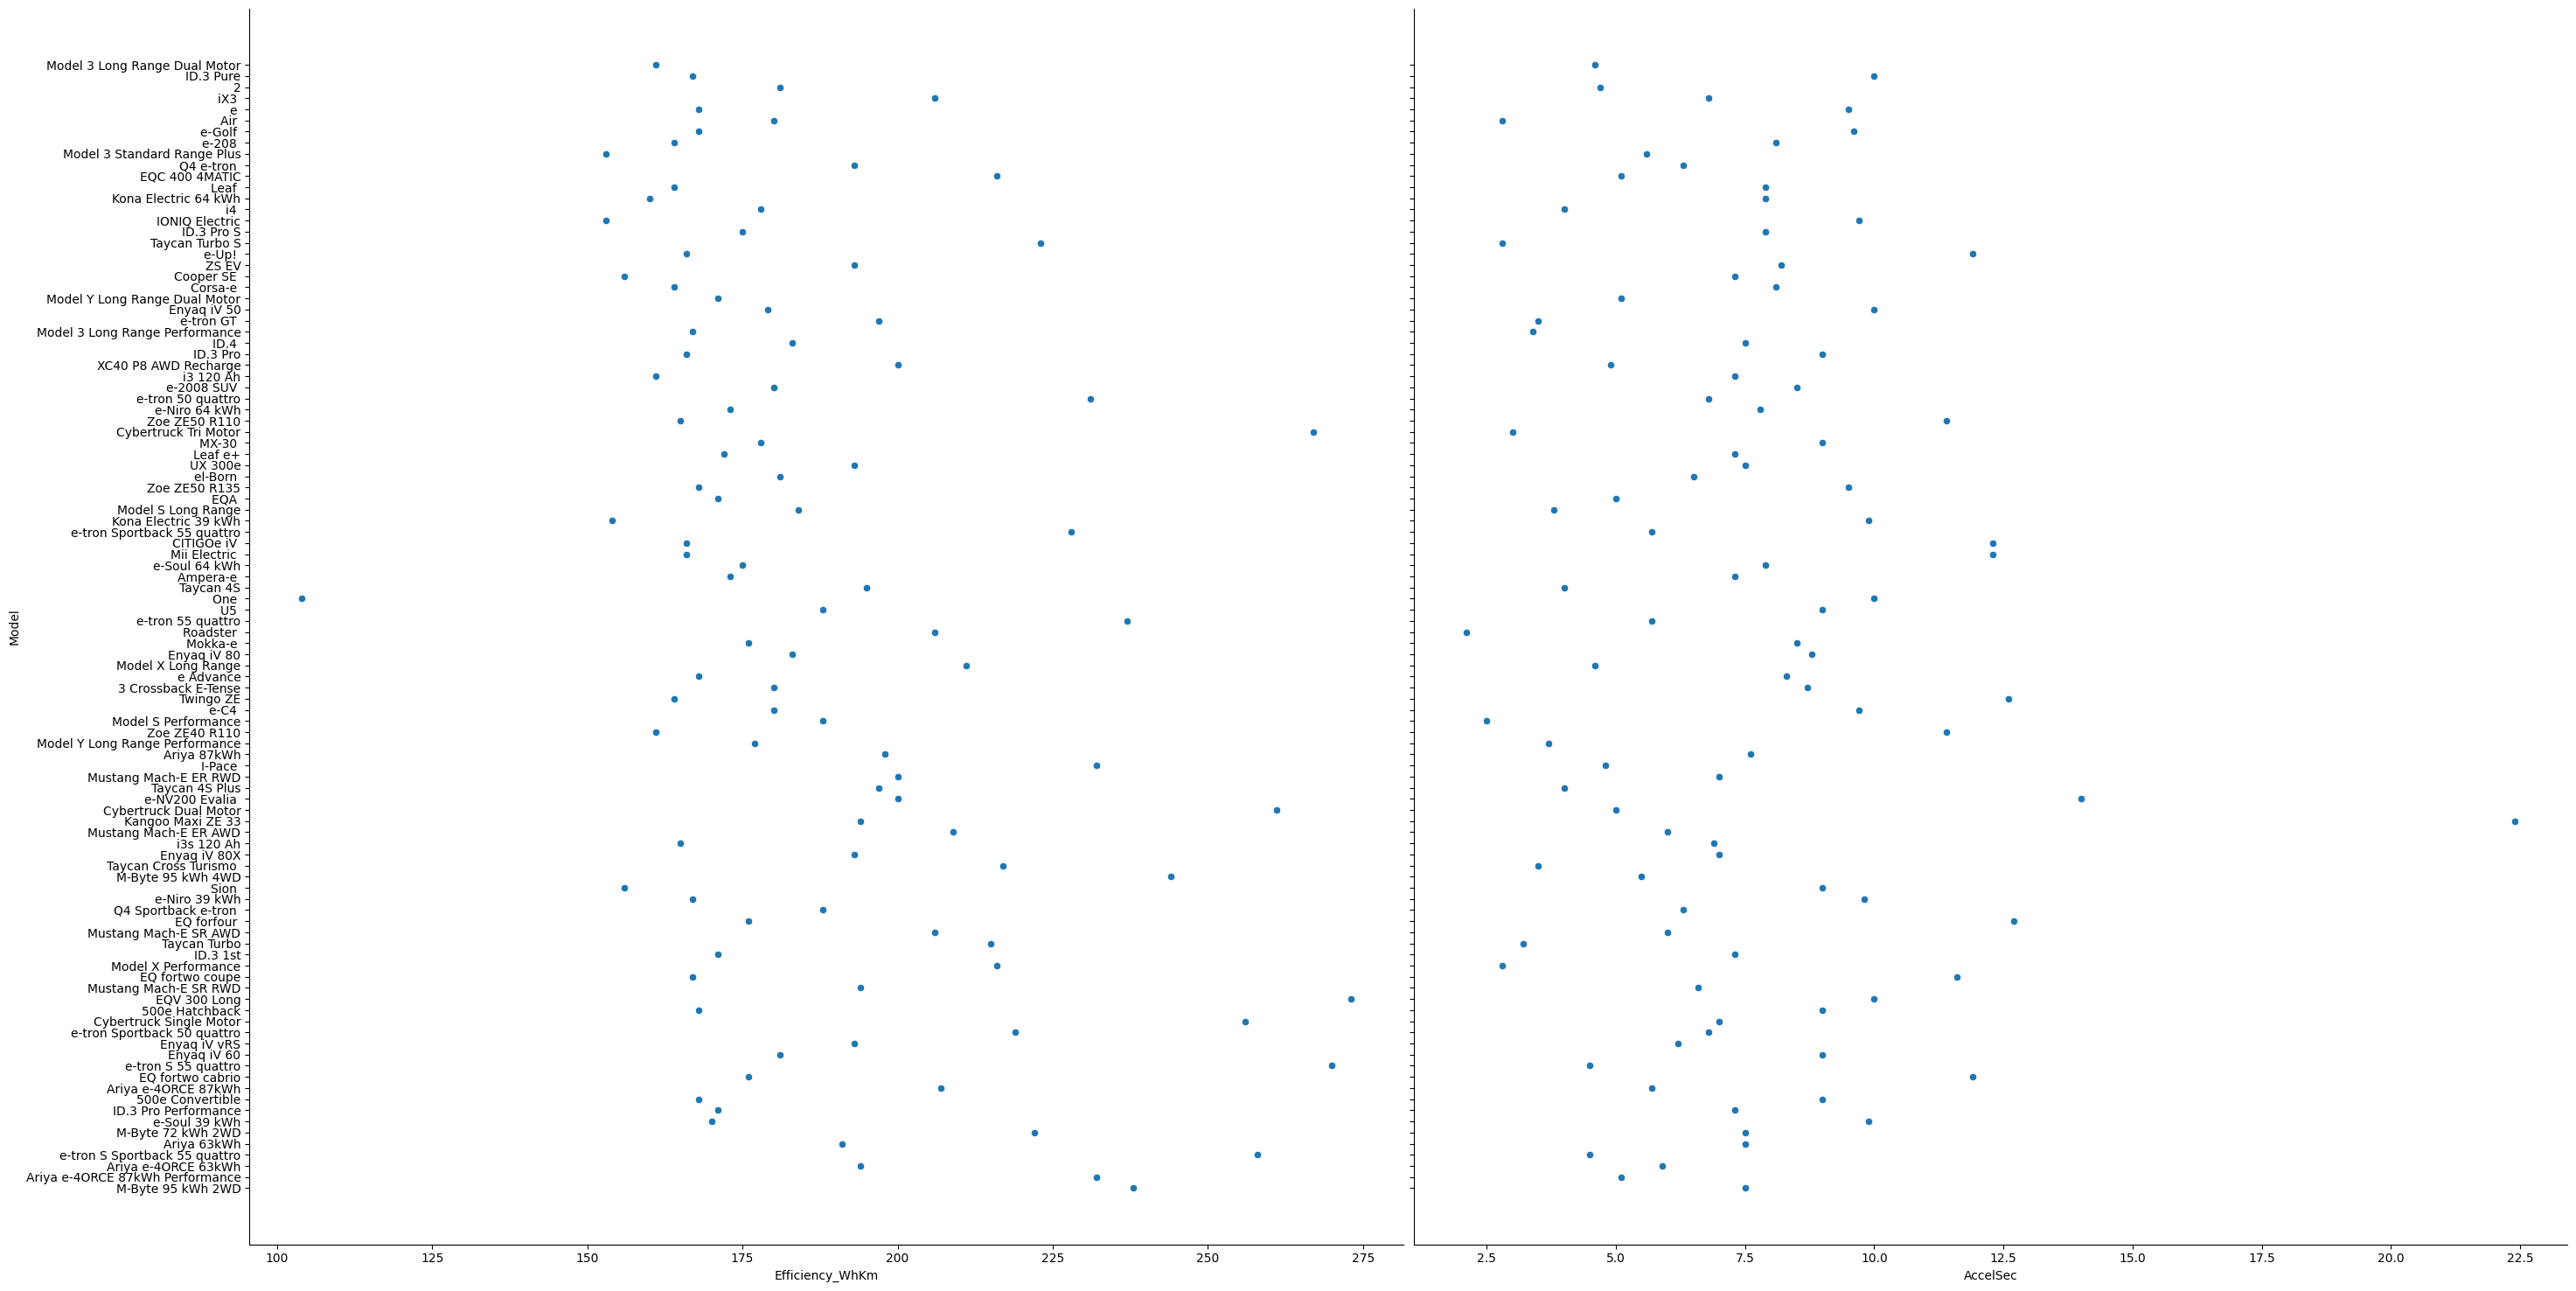

In [ ]:
sns.pairplot(ecd, x_vars=[ 'Efficiency_WhKm','AccelSec' ], y_vars = 'Model', size = 15, kind = 'scatter' )
plt.show()

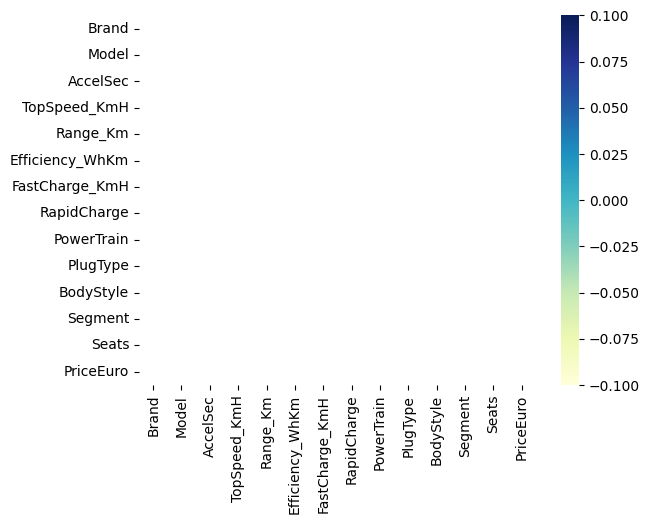

In [ ]:
#find correlation
# this data has not provide best correlation
ecd_numeric = ecd.apply(pd.to_numeric, errors='coerce')

# Optionally, drop rows or columns with NaN values
ecd_numeric = ecd_numeric.dropna()

# Now, create the heatmap with the correct colormap name
sns.heatmap(ecd_numeric.corr(), cmap='YlGnBu', annot=True, fmt=".2f")
plt.show()

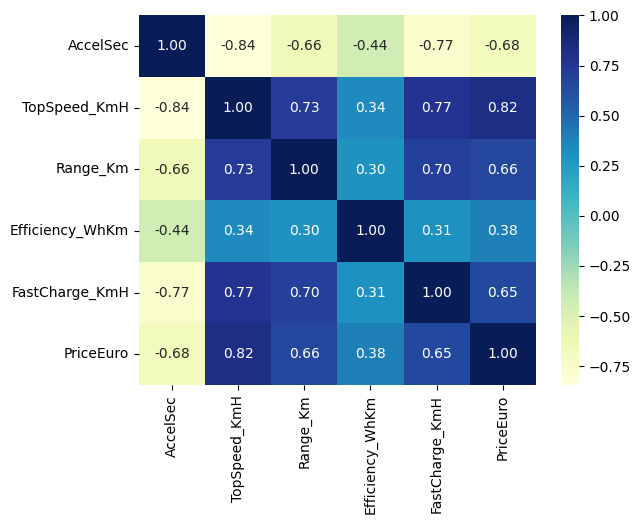

In [ ]:
# this provide best data correlation between them
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `ecd` is your DataFrame

# Replace '-' with NaN
ecd.replace('-', np.nan, inplace=True)

# Convert all columns to numeric, coercing errors (including '-' -> NaN)
ecd[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'PriceEuro']] = ecd[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'PriceEuro']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
ecd.dropna(inplace=True)

# Now calculate the correlation matrix and plot the heatmap
numeric_cols = ecd[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'PriceEuro']]
correlation_matrix = numeric_cols.corr()

# Display the heatmap
sns.heatmap(correlation_matrix, cmap='YlGnBu', annot=True, fmt=".2f")
plt.show()



**Explaination of this**
The heatmap indicates that variables like TopSpeed_KmH and PriceEuro are strongly correlated with each other. Similarly, AccelSec is negatively correlated with these variables, indicating that faster cars (lower AccelSec) tend to be more expensive and have higher top speeds.
Efficiency_WhKm shows moderate correlations with other variables, suggesting that energy efficiency does not vary as strongly with the other factors


In [ ]:
X = ecd[['TopSpeed_KmH']]  # Independent variable
Y = ecd['PriceEuro']       # Dependent variable

Mean Squared Error: 529008556.53581095
R-squared: 0.5313789809290136


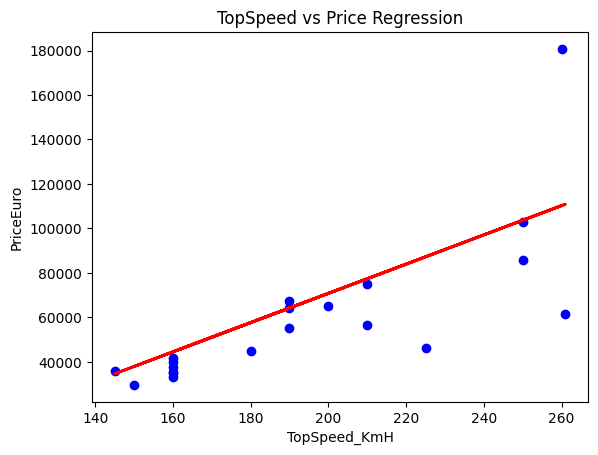

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, Y_train)

# Predict on the test data
Y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))
print("R-squared:", r2_score(Y_test, Y_pred))

# Plot the regression line
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.xlabel('TopSpeed_KmH')
plt.ylabel('PriceEuro')
plt.title('TopSpeed vs Price Regression')
plt.show()

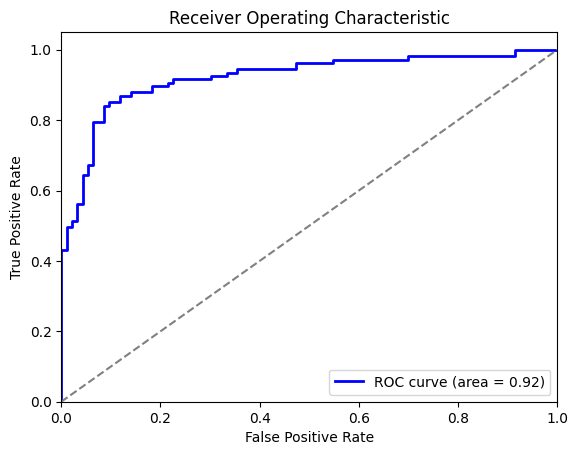

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification  # generate synthetic classification
from sklearn.model_selection import train_test_split  #splitting data into training & tesing data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc          # create auc & roc model

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()   # create instance of logistic regression
model.fit(X_train, y_train)    # train data

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # predict the probability of each class for test data

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
